### Fancy Indexing

In [4]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
ind = [3, 7, 4]
x[ind]

#팬시 인덱싱 : x의 형상이 아니라 ind의 형상을 반영

array([71, 86, 60], dtype=int32)

In [3]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]], dtype=int32)

여러 차원에서도 동작 : 
첫번째 인덱스는 행, 두번째 인덱스는 열을 뜻함

예) 첫번째 값은 X[0,2] 두번째 값은 X[2,3]을 의미

In [11]:
X = np.arange(12).reshape((3, 4))
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

#### 결합 인덱싱

In [12]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
#펜시 인덱싱과 단순 인덱스 결합
X[2, [2, 0, 1]]

array([10,  8,  9])

In [ ]:
#펜시 인덱싱과 슬라이싱 결합
X[1:, [2, 0, 1]]

In [13]:
#펜시 인덱싱과 마스킹 결합
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

#### 예제 : 데이터 구간화(Binning)

1000개의 값이 있고 그 값들이 배열에서 어디에 속하는지 빠르게 찾고 싶다

<<<함수 설명>>>

+ zeros_like : 주어진 배열과 같은 형태를 가지지만 값을 모두 0으로 채움
+ searchsorted : 정렬된 배열에서 특정 값이 삽입될 수 있는 위치를 반환하는 함수


In [5]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)    

# 각 x에 대한 적절한 구간 찾기
i = np.searchsorted(bins, x)

#각 구간에 1 더하기
np.add.at(counts, i, 1)


이제 집계값인 counts는 각 구간 내에 포함된 점의 개수, 즉 히스토그램을 나타냄

In [6]:
counts

array([ 0.,  0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,
        7.,  1.,  0.,  0.,  0.,  0.,  0.])

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

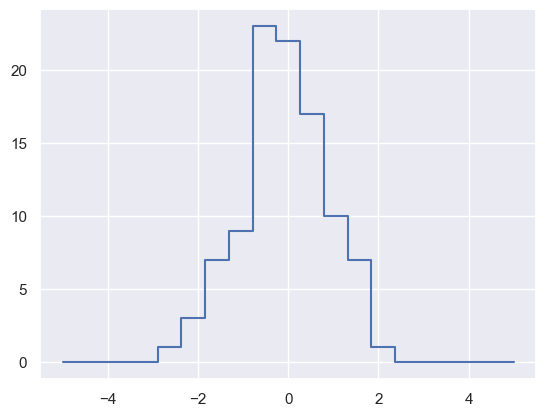

In [33]:
# plot the results
plt.step(bins, counts);

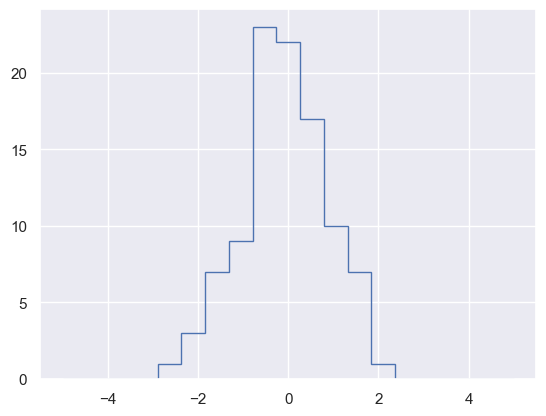

In [ ]:
#직접 구하지 않고 히스토그램을 그리는 방법
plt.hist(x, bins, histtype='step');